In [1]:
import warnings                                      #Í∏∞Ï°¥Ïùò ÌïÑÏöîÌïú Í≤ÉÎì§ÏùÑ Îã§ import
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')            #Ïù¥Î≤à ÎÖ∏ÎìúÏ§ë 2Î≤àÏ®∞Í≤ÉÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÑÎã®ÌïòÍ≤å ÏΩîÎî©Ìï®
test_data_path = join(data_dir, 'test.csv')              

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('Ïñçüí¢')

Ïñçüí¢


In [3]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)#dataÏùò Íµ¨ÏÑ±ÏùÑ ÎÖ∏ÎìúÏóêÏÑú Ïù¥ÎØ∏ Î¥§ÏúºÎØÄÎ°ú dataÏ§ëÏóêÏÑú ÎÖÑÏõîÏùºÎßå ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥
train.head()                                                     #ÎûåÎã§Î•º Ïù¥Ïö©ÌïòÏòÄÎã§.

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [4]:
y = train['price']                   #priceÎäî ÌÉÄÍ≤ü Í∞íÏù¥ÎØÄÎ°ú Ìä∏Î†àÏù∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑ† ÏÇ≠Ï†ú
del train['price']                   #test Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ïù¥ÎØ∏ ÏóÜÏúºÎØÄÎ°ú ÏÇ≠Ï†ú ÏïàÌï¥ÎèÑ ÎêúÎã§.

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
del train['id']                  #ÏïÑÏù¥ÎîîÎäî ÌïÑÏöîÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ïù¥ÎØÄÎ°ú ÏÇ≠Ï†ú Ìï¥ Ï§ÄÎã§.

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
y   

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

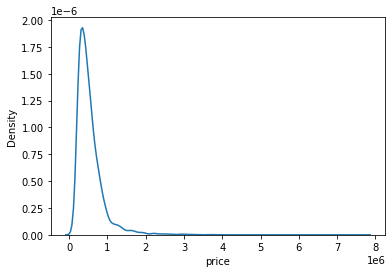

In [8]:
sns.kdeplot(y)
plt.show()             #yÏùò Í∞íÏù¥ ÏïûÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏ†∏ ÏûàÎäîÍ≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Í∞Ä ÌïÑÏöî

In [9]:
y = np.log1p(y)                     #yÎ•º Î°úÍ∑∏Ìôî ÌïòÏó¨ xÏïûÏ™Ω Î∂ÄÎ∂ÑÏùÄ yÏùò Ìé∏Ï∞®Í∞Ä ÌÅ¨Í≤å Îí§Ïùò xÍ∞íÏùÄ yÏùò Ï∞®Ïù¥Í∞Ä Ï§ÑÏñ¥ xÏïûÏ™ΩÏùÄ ÎÑìÍ≤å xÎí§Ï™ΩÏùÄ Ï¢ÅÍ≤å ÎßåÎìúÎäî Ìö®Í≥ºÍ∞Ä ÏûàÎã§.
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

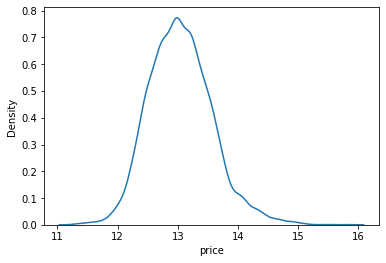

In [10]:
sns.kdeplot(y)          #Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎêúÍ≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.
plt.show()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [12]:
#Î™®Îç∏ ÌäúÎãùÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† Ïó¨Îü¨ Í∞ÄÏßÄ Î∞òÎ≥µÎêòÎäî ÏûëÏóÖÎì§ÏùÄ Ìï®ÏàòÎ°ú Î®ºÏ†Ä ÎßåÎì§Ïñ¥ ÎÜìÍ≥† ÎßéÏùÄ Ïã§ÌóòÌïòÎäîÍ≤å Ï¢ãÎã§ Ïö∞ÏÑ† Ìï®ÏàòÌôî.
#ÌõàÎ†® Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú train_test_split RMSE Ï†êÏàò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú mean_squared_error ÏùÑ import

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('Ïñçüí¢')

Ïñçüí¢


In [14]:
#ÎåÄÌöåÏôÄ Í∞ôÏùÄ ÌèâÍ∞Ä Ï≤ôÎèÑÏù∏ RMSEÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ÏúÑÌï¥ÏÑú Ìï®ÏàòÎ•º ÎßåÎì†Îã§. Í∑∏Îü∞Îç∞ y_testÎÇò y_predÎäî ÏúÑÏóêÏÑú np.log1p()Î°ú Î≥ÄÌôòÏù¥ Îêú Í∞íÏù¥ÎØÄÎ°ú
#Îã§Ïãú ÏõêÎûò Îã®ÏúÑÎ°ú ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú np.expm1()ÏùÑ Ï∂îÍ∞ÄÌï¥ Ï§ÄÎã§.

In [15]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

Ïñçüí¢


In [17]:
# XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî 
#ÎûúÎç§ ÏãúÎìúÍ∞íÏù∏ random_state Í∞íÏùÑ ÌäπÏ†ï Í∞íÏúºÎ°ú random_stateÎ•º Í≥†Ï†ïÍ∞íÏúºÎ°ú Ï£ºÎ©¥ Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÎèôÏùºÌïú Í≤ΩÏö∞ Î®∏Ïã†Îü¨Îãù ÌïôÏäµÍ≤∞Í≥ºÎèÑ 
#Ìï≠ÏÉÅ ÎèôÏùºÌïòÍ≤å Ïû¨ÌòÑ noneÍ∞íÏùÑ Ï£ºÎ©¥ Ìï≠ÏÉÅ ÎûúÎç§ÌïòÍ≤å ÎêúÎã§. Ïö∞Î¶¨Îäî ÏÑ±Îä•ÏùÑ Ïò¨Î†§Ï£ºÎäî ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏúºÎ†§ ÌïòÎäî Í≤É Ïù¥Í∏∞ ÎñÑÎ¨∏Ïóê Í∞íÏùÑ Í≥†Ï†ï.

In [18]:
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

Ïñçüí¢


In [19]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [20]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [21]:
def get_scores(models, train, y):                #ÎåÄÌöå Í≤∞Í≥ºÍ∞íÏù∏ RMSEÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì†Îã§.
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

RMSE
GradientBoostingRegressor  128360.196497
RandomForestRegressor      125487.071025
LGBMRegressor              111920.367359
XGBRegressor               110318.669566

In [22]:
#ÏúÑÏùò ÍπåÏßÄ Í≥ºÏ†ïÏù¥ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Ï∞æÏùÑÎïå RMSE Í≤∞Í≥ºÍ∞íÏùÑ Í≥ÑÏÇ∞Í∞íÏùÑ Í≥ÑÏÇ∞ Ìï† Ïàò ÏûàÎã§. Îî∞ÎùºÏÑú Ïó¨Îü¨ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Î≥ÄÌôî Ìï¥ Í∞ÄÎ©¥ÏÑú
#ÏÑ±Îä• Ìï≠ÏÉÅÏù¥ Ïù¥Î§ÑÏßÄÎäîÏßÄ Í∑∏ÎñÑÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Î≠îÏßÄ Ï∞æÏùÑ Ïàò ÏûàÏùÑÍ≤ÉÏù¥Îã§.

In [23]:
from sklearn.model_selection import GridSearchCV

print('Ïñçüí¢')

Ïñçüí¢


In [24]:
#Ïö∞ÏÑ† Í∑∏Î¶¨Îìú ÌÉêÏÉâÍ≥º ÎûúÎç§ ÌÉêÏÉâÏùÑ ÏïåÏïÑÎ≥º ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. Îëê Í∞ÄÏßÄ Î™®Îëê ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ìï©Ìï¥ Î≥¥Îäî Î∞©Î≤ï
#Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÄ ÏÇ¨ÎûåÏù¥ Î®ºÏ†Ä ÌÉêÏÉâÌï† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÎì§ÏùÑ Ï†ïÌï¥ÎëêÍ≥†, Í∑∏ Í∞íÎì§Î°ú ÎßåÎì§Ïñ¥Ïßà Ïàò ÏûàÎäî Î™®Îì† Ï°∞Ìï©ÏùÑ ÌÉêÏÉâ
#ÌäπÏ†ï Í∞íÏóê ÎåÄÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Î™®Îëê ÌÉêÏÉâÌïòÍ≥†Ïûê Ìï† Îïå Ïú†Î¶¨
#ÎûúÎç§ ÌÉêÏÉâÏùÄ ÏÇ¨ÎûåÏù¥ ÌÉêÏÉâÌï† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïùò Í≥µÍ∞Ñ Í∑∏ ÏïàÏóêÏÑú ÎûúÎç§ÏúºÎ°ú Ï°∞Ìï©ÏùÑ ÏÑ†ÌÉùÌï¥ÏÑú ÌÉêÏÉâ
#Îî∞ÎùºÏÑú ÌèâÍ∑†Í∞íÏùÄ Í∑∏Î¶¨Îìú ÌÉêÏÉâ Í≥†Ï†êÏùÄ ÎûúÎç§ ÌÉêÏÉâÏù¥ ÎÜíÎã§ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏòÄÎã§.

#Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î•º ÏûÖÎ†•ÌïòÎ©¥ Í∞ÄÎä•Ìïú Î™®Îì† Ï°∞Ìï©ÏùÑ ÌÉêÏÉâÌïòÎäî ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò GridSearchCVÎ•º ÌôúÏö©

In [25]:
#GridSearchCVÏóê ÏûÖÎ†•ÎêòÎäî Ïù∏Ïûê
#param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)Ïôú?
#scoring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú
#cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò
#verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë (Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•
#n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò

In [26]:
param_grid = { 'n_estimators': [50, 100],'max_depth': [1, 10],}

In [27]:
model = LGBMRegressor(random_state=random_state)

print('Ïñçüí¢')

Ïñçüí¢


In [28]:
#Í∑∏Îü¨Î©¥ model, param_gridÏôÄ Ìï®Íªò Îã§Î•∏ Ïó¨Îü¨ Í∞ÄÏßÄ Ïù∏ÏûêÎ•º ÎÑ£Ïñ¥ÏÑú GridSearchCVÎ•º ÏàòÌñâÌï† Ïàò ÏûàÎã§?

In [29]:
#GridSearchCVÎ•º Ïù¥Ïö©Ìï¥ÏÑú grid_model Î™®Îç∏ÏùÑ Ï¥àÍ∏∞Ìôî
#trainÍ≥º y Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ Í∞ÑÎã®Ìûà ÌïôÏäµ             
#Ïù¥ 2Í∞ÄÏßÄÎ°ú ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Ïóê ÎåÄÌïú Ïã§Ìóò
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [30]:
#ÏûÖÎ†•Ìïú param_gridÏóê n_estimators 2 max_depth 2 ÎÑ£ÏóàÏúºÎØÄÎ°ú Í∞ÄÎä•Ìïú Ï°∞Ìï©ÏùÄ Ï¥ù 2 √ó 2 =4
#cross validationÏùÄ ÌöåÎãπ 5Î≤àÏùÑ ÏßÑÌñâÌïòÎãà Ï¥ù 20 fitsÎ•º ÏßÑÌñâ
#5Î≤à ÏßÑÌñâ ÌõÑ ÌèâÍ∑†ÏùÑ Ï∑®ÌïòÎäî Ïù¥Ïú†Îäî ÏùºÎ∞òÌôî Ïò§Ï∞®Î•º Ïã†Î¢∞ÎèÑ ÎÜíÍ≤å Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥


In [31]:
grid_model.cv_results_
#ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÄ ÏúÑ ÎîïÏÖîÎÑàÎ¶¨ Ï§ë paramsÏóê, Í∞ÅÍ∞ÅÏóê ÎåÄÌïú ÌÖåÏä§Ìä∏ Ï†êÏàòÎäî mean_test_scoreÏóê Ï†ÄÏû• Ïö∞Î¶¨Í∞Ä ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Îäî 2Í∞ÄÏßÄ
#Îî∞ÎùºÏÑú Îî∞Î°ú Ï∂îÏ∂ú ÌïÑÏöî

{'mean_fit_time': array([0.15456867, 0.18743978, 0.31507258, 0.50123534]),
 'std_fit_time': array([0.05958502, 0.00143803, 0.00958566, 0.09107443]),
 'mean_score_time': array([0.01377559, 0.01097555, 0.01697154, 0.03567414]),
 'std_score_time': array([0.00935255, 0.00070536, 0.00045236, 0.00996696]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [32]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [33]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [34]:
results = pd.DataFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [35]:
#GridSearchCVÎ°ú grid_model Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌï† Îïå, scoring Ïù∏ÏûêMSEÏóê ÏùåÏàòÎ•º Ï∑®Ìïú Í∞íÏù∏ neg_mean_squared_errorÎ•º ÏûÖÎ†•ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïä§ÏΩîÏñ¥Í∞Ä
#ÏùåÏàòÎ°ú ÎÇòÏò®Îã§. GridSearchCVÎ°ú Íµ¨ÌïòÎäî Ï¢ÖÎ•òÎäî Classification, Clustering, Regression Î°ú Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäîÎç∞ Ïù¥Î≤àÏóê Ïö∞Î¶¨Í∞Ä Íµ¨ÌïòÎäî Í≤ÉÏùÄ
#Regression Ïù¥ÎØÄÎ°ú  neg_mean_squared_errorÎ•º ÏÇ¨Ïö©ÌïúÍ≤ÉÏù¥Îã§. ÏùåÏàòÎ°ú Îêú Ï†êÏàòÎ•º Î≥ÄÌôò Ìï† ÌïÑÏöîÍ∞Ä ÏÉùÍ∏¥Îã§.

In [36]:
results['RMSE'] = np.sqrt(-1 * results['score'])#-1Î•º Í≥±Ìï¥Ï§ò ÏñëÏàòÌôî.
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [37]:
# priceÏùò Î∂ÑÌè¨Í∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏ†∏ ÏûàÎäî Í≤ÉÏùÑ Î≥¥Í≥† log Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏù¥ ÏûàÏóàÎäîÎç∞ Í∑∏Î¶¨Îìú ÌÉêÏÉâÏ§ëÏóêÎäî np.exp1()ÏúºÎ°ú Îã§Ïãú ÏõêÎûò ÌòïÌÉúÎ°ú Î≥ÄÌôò
# ÌïòÏßÄ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏Ïóê log Î≥ÄÌôòÎêòÏñ¥ ÏûàÎäî price Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÜêÏã§Ìï®ÏàòÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïúÍ≤É. Í∑∏ ÎïåÎ¨∏Ïóê Ï†úÎåÄÎ°ú Îêú Í∞íÏù¥ ÎÇòÏò§ÏßÄ ÏïäÏïòÎã§.

In [38]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [39]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [40]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [41]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

In [42]:
prediction = np.expm1(prediction)
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

In [43]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [44]:
submission['price'] = prediction
submission.head()

id         price
0  15035  5.067667e+05
1  15036  4.795061e+05
2  15037  1.345155e+06
3  15038  3.122579e+05
4  15039  3.338645e+05

In [45]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [46]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
print('{} saved!'.format(submission_csv_path))

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv saved!


In [47]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

In [48]:
#ÏïûÏùò Í≥ºÏ†ïÏùÄ Ïù¥Î≤à ÎÖ∏Îìú 2Î≤àÏ®∞Î•º ÌïúÎ≤à Ìï¥Î≥∏ Í≤ÉÏù¥Îã§. Ïù¥Î≤àÏóê ÏßÑÏßúÎ°ú ÏöîÍµ¨ÌïòÎäîÍ≤ÉÏùÄ ÏïÑÎûòÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Ï¢ÄÎçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º Íµ¨ÌïòÎäîÍ≤ÉÏù¥Îã§.
#max_depth : ÏùòÏÇ¨ Í≤∞Ï†ï ÎÇòÎ¨¥Ïùò ÍπäÏù¥, Ï†ïÏàò ÏÇ¨Ïö©
#learning_rate : Ìïú Ïä§ÌÖùÏóê Ïù¥ÎèôÌïòÎäî ÏñëÏùÑ Í≤∞Ï†ïÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞, Î≥¥ÌÜµ 0.0001~0.1 ÏÇ¨Ïù¥Ïùò Ïã§Ïàò ÏÇ¨Ïö©
#n_estimators : ÏÇ¨Ïö©ÌïòÎäî Í∞úÎ≥Ñ Î™®Îç∏Ïùò Í∞úÏàò, Î≥¥ÌÜµ 50~100 Ïù¥ÏÉÅÏùò Ï†ïÏàò ÏÇ¨Ïö©
#num_leaves : ÌïòÎÇòÏùò LightGBM Ìä∏Î¶¨Í∞Ä Í∞ÄÏßà Ïàò ÏûàÎäî ÏµúÎåÄ ÏûéÏùò Ïàò
#boosting_type : Î∂ÄÏä§ÌåÖ Î∞©Ïãù, gbdt, rf Îì±Ïùò Î¨∏ÏûêÏó¥ ÏûÖÎ†•

In [49]:
#Í∏∞Ï°¥Ïóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌîºÏ≤òÎ•º Î™®Îç∏ÏùÑ Î≥¥Îã§ Ïûò ÌëúÌòÑÌï† Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Ï≤òÎ¶¨ÌïòÍ∏∞ (ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ)
#LGBMRegressor, XGBRegressor, RandomForestRegressor ÏÑ∏ Í∞ÄÏßÄ Ïù¥ÏÉÅÏùò Îã§ÏñëÌïú Î™®Îç∏Ïóê ÎåÄÌï¥ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÌïòÍ∏∞
#Îã§ÏñëÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌï¥ Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏãúÎèÑÌï¥ÏÑú ÏµúÏ†ÅÏùò Ï°∞Ìï©ÏùÑ Ï∞æÏïÑÎ≥¥Í∏∞
#Baseline Ïª§ÎÑêÏóêÏÑú ÌôúÏö©ÌñàÎçò Î∏îÎ†åÎî© Î∞©Î≤ï ÌôúÏö©

In [50]:
#Í∏∞Ï°¥Ïóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌîºÏ≤òÎ•º Î™®Îç∏ÏùÑ Î≥¥Îã§ Ïûò ÌëúÌòÑÌï† Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Ï≤òÎ¶¨ÌïòÍ∏∞ (ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ)
#LGBMRegressor, XGBRegressor, RandomForestRegressor ÏÑ∏ Í∞ÄÏßÄ Ïù¥ÏÉÅÏùò Îã§ÏñëÌïú Î™®Îç∏Ïóê ÎåÄÌï¥ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÌïòÍ∏∞
#Îã§ÏñëÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌï¥ Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏãúÎèÑÌï¥ÏÑú ÏµúÏ†ÅÏùò Ï°∞Ìï©ÏùÑ Ï∞æÏïÑÎ≥¥Í∏∞
#Baseline Ïª§ÎÑêÏóêÏÑú ÌôúÏö©ÌñàÎçò Î∏îÎ†åÎî© Î∞©Î≤ï ÌôúÏö©ÌïòÍ∏∞

In [51]:
#Ïó¨Îü¨Í∞úÎ•º Ï∫êÍ∏ÄÏóêÏÑú Ï∞∏Ï°∞ÌïòÎäî Ï§ë Í±¥Ï∂ïÏ†ÅÏù∏ ÎßàÏù∏ÎìúÍ∞Ä Îì§Ïñ¥Í∞Ñ Ï∫êÍ∏ÄÏùÑ Î≥¥Í≥† Ïù¥Í≤ÉÏùÑ Ìï¥ÏÑùÌï¥ Î≥¥ÎäîÍ≤ÉÎèÑ Í≥µÎ∂ÄÍ∞Ä Îê† Í≤É Í∞ôÏïÑÏÑú
#Í∑∏ÎÉ• Ïù¥Í≤ÉÏùÑ Ïôú ÎÑ£ÏóàÍ≥† Î¨¥Ïä® ÏùòÎØ∏Ïù∏ÏßÄÎ•º Ìï¥ÏÑùÌïòÎäîÍ≤ÉÏóê Ï¥àÏ†êÏùÑ Îë¨Î¥§Îã§.

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [53]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')        #Í∞ÅÏ¢Ö ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¥Ìä∏

In [54]:
def print_best_params(model, params):           
    grid_model = GridSearchCV(
        model, 
        param_grid = params,
        cv=5,
        scoring='neg_mean_squared_error')

    grid_model.fit(df_train_features, df_train_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(
        '{0} 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í {1}, ÏµúÏ†Å alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [55]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print('Ïñçüí¢')

Ïñçüí¢


In [56]:
for df in [df_train, df_test]:
	df['sale_yr'] = pd.to_numeric(df.date.str.slice(0, 4))          #ÏÉàÎ°úÏö¥ ÌååÎùºÎØ∏ÌÑ∞Î•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú Íµ¨Îß§Ìïú Ïó∞ÎèÑ
	df['sale_month'] = pd.to_numeric(df.date.str.slice(4, 6))       #Íµ¨Îß§Ìïú Îã¨
	df['sale_day'] = pd.to_numeric(df.date.str.slice(6, 8))         #Íµ¨Îß§Ìïú Ïùº
	df.drop(['id', 'date'], axis=1, inplace=True)

In [57]:
df_train = df_train.astype('float32')
df_test = df_test.astype('float32')

In [58]:
for df in [df_train, df_test]:
	#Ïû¨Í±¥Ï∂ï Ïó¨Î∂Ä
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x < 0 else 1)    #Í±¥Ï∂ïÏó∞ÎèÑÏôÄ Í∞úÏ°∞(ÏàòÎ¶¨) Ïó¨Î∂ÄÏùò Ï∞®Î•º ÌåêÎ≥ÑÌïòÏó¨ Ïû¨Í±¥Ï∂ï Ïó¨Î∂ÄÎùºÎäî ÌååÎùºÎØ∏ÌÑ∞Î•º ÎßåÎì§ÏóàÎã§.
	
    # Ïö©Ï†ÅÎ•† Ï£ºÍ±∞ Í≥µÍ∞Ñ / ÎåÄÏßÄ Î©¥Ï†ÅÏùÑ ÌïòÎÇòÏùò ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏÑ§Ï†ï
    df['far1'] = df['sqft_living'] / df['sqft_lot']      
    # Full Bath ÏàòÎäî Ï£ºÍ±∞Ïóê Í∞ÄÏû• Ï§ëÏöîÌïú ÏöîÏÜåÏ§ëÏóê ÌïòÎÇòÏù¥Îã§. ÎåÄÎ∂ÄÎ∂Ñ Î∞© Î™áÍ∞ú ÌôîÏû•Ïã§ Î™áÍ∞úÍ∞Ä ÌùîÌûà ÌåêÎã®ÎêòÎäî ÏßëÏùò ÏöîÏÜå Ïù¥ÎØÄÎ°ú Ï∂îÍ∞Ä
    df['full_bath'] = (df['bathrooms'] / 1) 
    df['full_bath'] = df['full_bath'].astype('int')

    df['75bath'] = (df['bathrooms'] - df['full_bath']) / 0.75
    df['75bath'] = df['75bath'].astype('int')

    df['50bath'] = (df['bathrooms'] - df['full_bath'] - df['75bath']*0.75) / 0.5
    df['50bath'] = df['50bath'].astype('int')

    df['25bath'] = (df['bathrooms'] - df['full_bath'] - df['75bath']*0.75 - df['50bath']*0.5) / 0.25
    df['25bath'] = df['25bath'].astype('int')

    df['total_bath'] = df['full_bath'] + df['75bath'] + df['50bath'] + df['25bath']

    # Ï∏µÎãπ ÌôîÏû•Ïã§ Í∞úÏàò      
    df['bath_per_floors'] = df['total_bath'] / df['floors']

    # Î∞©Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
    df['bath_per_rooms'] = df['total_bath'] / df['bedrooms']

In [59]:
df_train['per_price'] = df_train['price'] / df_train['sqft_living']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean'}).reset_index()
df_train = pd.merge(df_train,zipcode_price,how='left',on='zipcode')
df_test = pd.merge(df_test,zipcode_price,how='left',on='zipcode')

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for df in [df_train, df_test]:
    df['zipcode_mean'] = df['mean'] * df['sqft_living']
    del df['mean']
    df['zipcode'] = encoder.fit_transform(df['zipcode'])
    df.drop([
        'sale_day', 'full_bath', '75bath', 
        '50bath', '25bath', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

df_train.drop(['per_price'], axis=1, inplace=True)

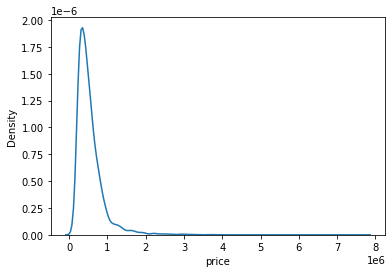

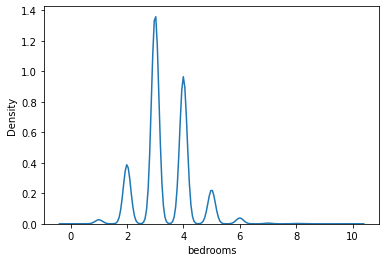

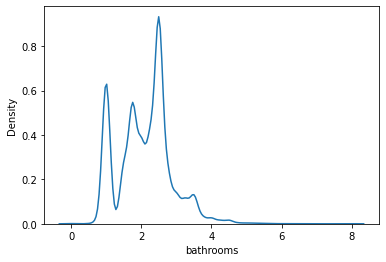

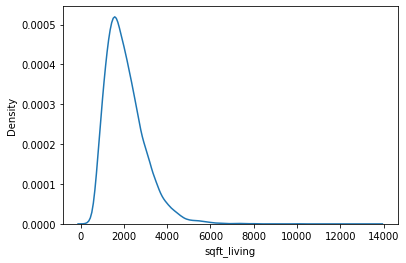

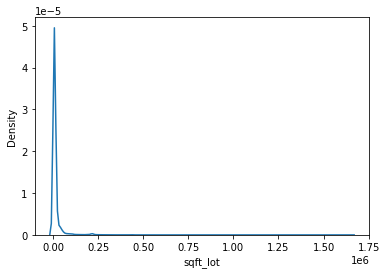

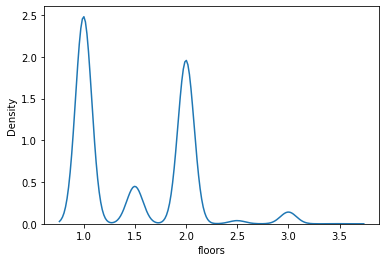

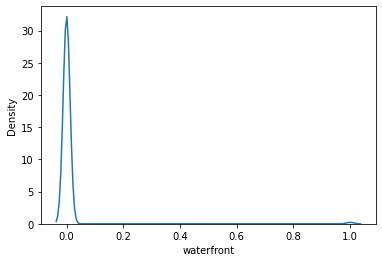

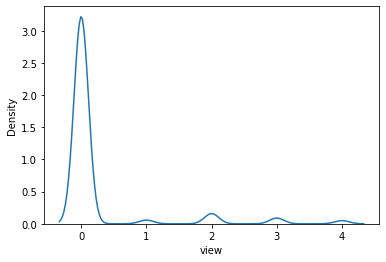

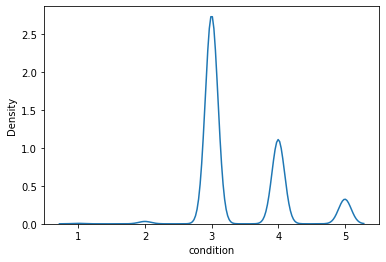

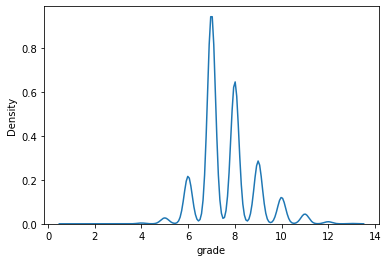

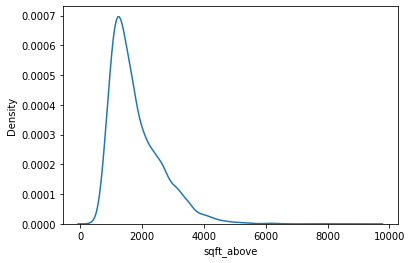

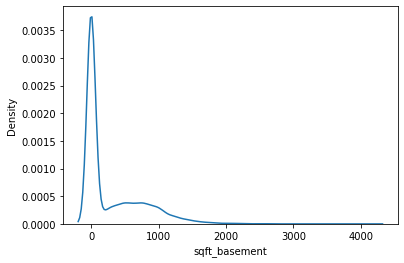

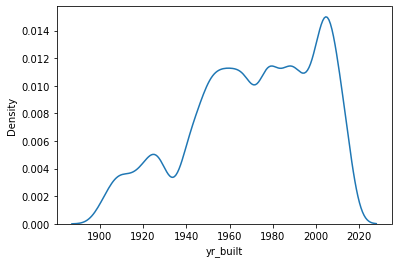

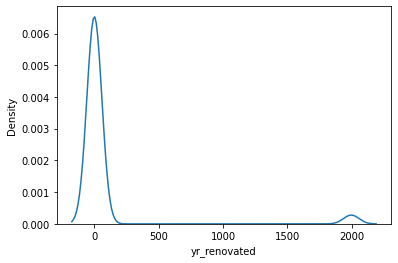

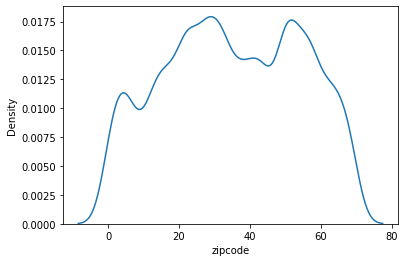

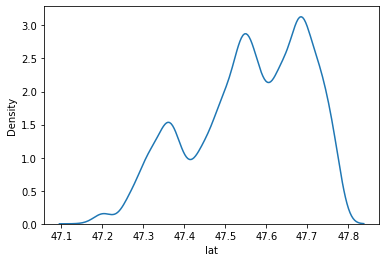

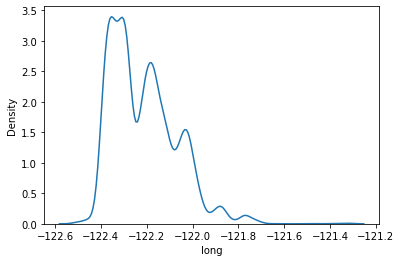

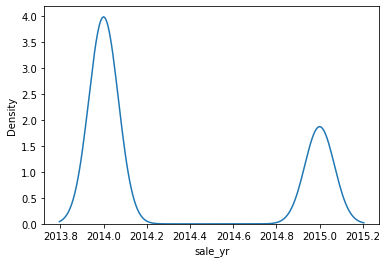

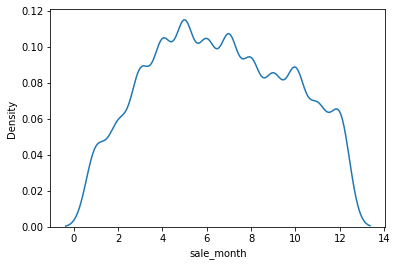

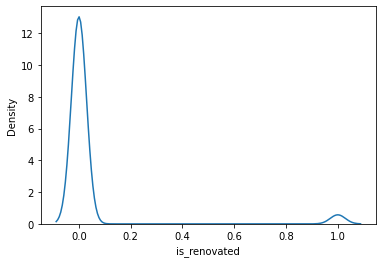

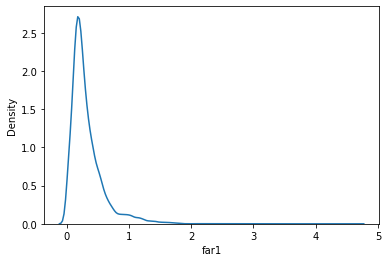

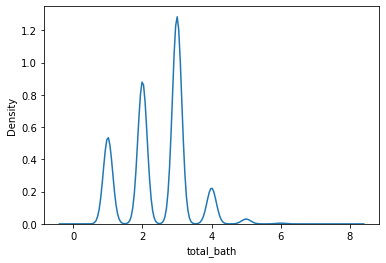

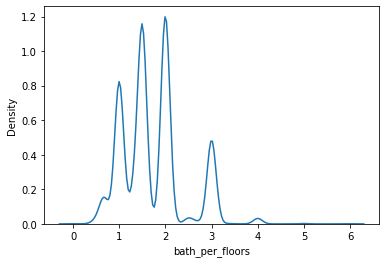

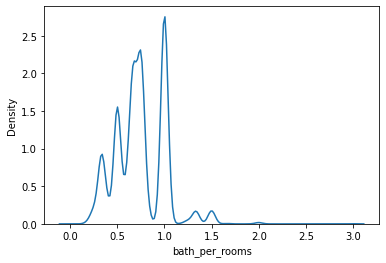

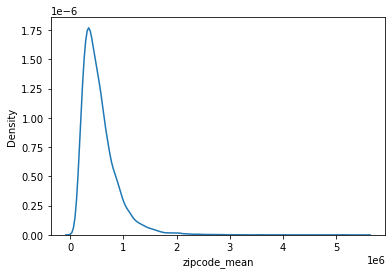

In [61]:
for c in df_train.columns:
	sns.kdeplot(df_train[c])
	plt.show()

In [62]:
skew_columns = [
    'sqft_living', 
    'sqft_lot', 
    'sqft_above',
    'sqft_basement',
    'far1',
    'zipcode_mean']

In [63]:
for df in [df_train, df_test]:
	for c in skew_columns:
		df[c] = np.log1p(df[c])

df_train['price'] = np.log1p(df_train['price'])

In [64]:
df_train_target = df_train['price']
df_train_features = df_train.drop(['price'], axis=1)

In [65]:
#ÏïÑÎûò ÏΩîÎìúÎäî ÌååÏù¥Ïç¨ Î®∏Ïã†Îü¨Îãù ÏôÑÎ≤ΩÍ∞ÄÏù¥ÎìúÏóêÏÑú Í∞ÄÏ†∏Ïò¥.

In [66]:
def print_best_params(model, params):
    grid_model = GridSearchCV(
        model, 
        param_grid = params,
        cv=5,
        scoring='neg_mean_squared_error')

    grid_model.fit(df_train_features, df_train_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(
        '{0} 5 CV Ïãú ÏµúÏ†Å ÌèâÍ∑† RMSE Í∞í {1}, ÏµúÏ†Å alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [67]:
xgb_params ={                                     
    'learning_rate': [0.05],
    'max_depth': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.5],
    'silent': [True],
    'gpu_id':[0] ,         
    'tree_method':['gpu_hist'],
    'predictor':['gpu_predictor'],
    'n_estimators':[1000],
    'refit' : [True]
}

xgb_model = XGBRegressor()
xgb_estimator = print_best_params(xgb_model, xgb_params)

XGBoostError: [13:50:16] ../src/data/data.cc:945: Check failed: valid: Input data contains `inf` or `nan`
Stack trace:
  [bt] (0) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7f7a3489c33f]
  [bt] (1) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x14e930) [0x7f7a34959930]
  [bt] (2) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x15f8ff) [0x7f7a3496a8ff]
  [bt] (3) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x156cf5) [0x7f7a34961cf5]
  [bt] (4) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGDMatrixCreateFromMat_omp+0x7c) [0x7f7a3489404c]
  [bt] (5) /opt/conda/lib/python3.9/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7f7ac207aa4a]
  [bt] (6) /opt/conda/lib/python3.9/lib-dynload/../../libffi.so.8(+0x5fea) [0x7f7ac2079fea]
  [bt] (7) /opt/conda/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x13dc7) [0x7f7ac2093dc7]
  [bt] (8) /opt/conda/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x14454) [0x7f7ac2094454]



In [ ]:
lgb_params = {
    'objective':['regression'],
    'num_leave' : [1],
    'learning_rate' : [0.05],
    'n_estimators':[1000],
    'max_bin' : [80],
    'gpu_id':[0] ,         
    'tree_method':['gpu_hist'],
    'predictor':['gpu_predictor'],
    'refit':[True]
}

lgb_model = LGBMRegressor()
lgb_estimator = print_best_params(lgb_model, lgb_params)

In [ ]:
xgb_preds = xgb_estimator.predict(df_test)
lgb_preds = lgb_estimator.predict(df_test)
preds = 0.5* xgb_preds + 0.5*lgb_preds

In [68]:
submission=pd.read_csv('../input/sample_submission.csv')
submission['price']=np.exp(preds)
submission.to_csv('xgb_lgb_submission.csv',index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../input/sample_submission.csv'

In [ ]:
#Ïö∞ÏÑ† Í∑∏ÎåÄÎ°ú Í±¥Ï∂ïÏóê ÎåÄÌï¥ Ï°∞Í∏à Ï†ÑÎ¨∏Ï†ÅÏúºÎ°ú Îì§Ïñ¥Í∞ÑÍ≤É Í∞ôÏïÑÏÑú ÌïúÎ≤à Ìï¥Î≥¥Î†§Í≥† ÌñàÎäîÎç∞ ÎÑàÎ¨¥ Ïò§ÎûúÎßåÏóê Í±¥Ï∂ïÏóê Í¥ÄÎ†®ÎêúÍ≤ÉÏùÑ Ìï¥ÏÑú Í∑∏Îü∞ÏßÄ Ï†úÎåÄÎ°ú ÌïòÏßÄ Î™ªÌñàÎã§.
#Í∑∏ÎåÄÎ°ú Î∞∞Íª¥ Ïò§ÎäîÍ≤ÉÏóêÏÑú Í≥ÑÏÜç Ïò§Î•òÍ∞Ä ÎÇò ÌïòÏßÄ Î™ªÌñàÎã§.
#Ïö∞ÏÑ† Ïó¨Îü¨ ÏöîÏÜåÎ•º Î∏îÎûúÎî©ÌïòÏó¨ Ìï¥Î≥¥Î†§Í≥† ÌñàÏúºÎÇò Ïñ¥ÎñªÍ≤å Ï†ÅÏö©Ìï¥Ïïº Îê†ÏßÄ Ï°∞Í∏à ÎÇúÍ∞êÌïòÏòÄÎã§.
#ÏïÑÏßÅ Ï∫êÍ∏ÄÏ†ïÎèÑÏùò Í≥ºÏ†ïÎ≥¥Îã® Ï°∞Í∏à Ïâ¨Ïö¥Í≤É ÏúÑÏ£ºÎ°ú Ïñ¥Îñ§ Í≤ÉÏù¥Îì† ÏΩîÎî©ÏùÑ Ï¢Ä Ìï¥Î¥êÏïº Í≤†Îã§Îäî Í±∏ ÎäêÎÇÑ Ïàò ÏûàÏóàÎã§.
#ÌïúÎ≤à Î∞ÄÎ¶¨ÎãàÍπå Îî∞ÎùºÏû°Í∏∞Í∞Ä ÎÑàÎ¨¥ ÌûòÎìúÎÑ§Ïöî.
#ÏïûÏóê ÎÖ∏ÎìúÎ•º Ïù¥Ìï¥ÌïòÎäîÎç∞ ÏãúÍ∞ÑÏùÑ ÎÑàÎ¨¥ Ïì¥ Í≤É Í∞ôÎã§. Í∑∏ÎûòÎèÑ ÏïûÏùò Í≥ºÏ†ïÏùÄ ÎåÄÎ∂ÄÎ∂Ñ Ïù¥Ìï¥Îäî Ìï† Ïàò ÏûàÏóàÎäîÎç∞ Ïã§Ï†ú Ï†ÅÏö©ÏùÑ ÌïòÎ†§Î©¥ Ï´å Î©çÌï¥ÏßÄÎäîÍ≤É Í∞ôÎã§
#ÏΩîÎî©ÏùÑ ÏàôÏ†úÏ≤òÎüº ÌïòÎãàÍπå Îçî ÏïàÌïòÎäîÍ≤É Í∞ôÏïÑÏÑú ÎÇòÎßåÏùò ÌîÑÎ°úÏ†ùÌä∏ ÏïÑÎ¨¥Í±∞ÎÇò ÌïòÎÇòÎ•º ÏßÑÌñâÌïòÎ†§Í≥† ÌïúÎã§.
# Í≤∞Í≥ºÏ†ÅÏúºÎ°† Ïù¥Î≤àÏóî ÎåÄ Ïã§Ìå®. ÏãúÍ∞ÑÏùÑ ÎßûÏ∂∞ ÎÇ¥ÎäîÍ≤ÉÏóê Í∏âÍ∏âÌñàÎã§.